#### Imports

In [20]:
import matplotlib.pyplot as plt

In [21]:
%run Comment_Questions.ipynb # Exectute temporary training Parameters

### Generate Data
Using the hidden function:

In [22]:
def hidden_function(x):
    return np.sin(x)

In [23]:
data_x = np.arange(-3,3,.1)
noise_y = np.random.normal(scale=.1,size=len(data_x))
true_y = hidden_function(data_x)
data_y = true_y + noise_y

d = len(data_x)

#### Plot Data Vs. Hidden Function

/usr/lib64/python3.7/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support array([-1.41120008e-01, -2.39249329e-01, -3.34988150e-01, -4.27379880e-01,
       -5.15501372e-01, -5.98472144e-01, -6.75463181e-01, -7.45705212e-01,
       -8.08496404e-01, -8.63209367e-01, -9.09297427e-01, -9.46300088e-01,
       -9.73847631e-01, -9.91664810e-01, -9.99573603e-01, -9.97494987e-01,
       -9.85449730e-01, -9.63558185e-01, -9.32039086e-01, -8.91207360e-01,
       -8.41470985e-01, -7.83326910e-01, -7.17356091e-01, -6.44217687e-01,
       -5.64642473e-01, -4.79425539e-01, -3.89418342e-01, -2.95520207e-01,
       -1.98669331e-01, -9.98334166e-02,  2.66453526e-15,  9.98334166e-02,
        1.98669331e-01,  2.95520207e-01,  3.89418342e-01,  4.79425539e-01,
        5.64642473e-01,  6.44217687e-01,  7.17356091e-01,  7.83326910e-01,
        8.41470985e-01,  8.91207360e-01,  9.32039086e-01,  9.63558185e-01,
        9.85449730e-01,  9.97494987e-01,  9.99573603e-01,  9.91664810e-01,
  

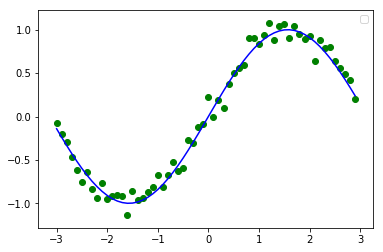

In [26]:
plt.plot(data_x,true_y,color='b')
plt.scatter(data_x,data_y,color='g')
plt.legend((true_y, data_y), ('label1', 'label2'))